In [763]:
import pandas as pd #Read file
import numpy as np #Matrix multiplication
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

In [764]:
df = pd.read_csv('/content/Heart_Attack_Data_Set.csv')

In [765]:
df.shape

(303, 14)

In [766]:
df.isnull().values.any() #IF there any null value reture True otherwise false

False

In [767]:
correlation=df.corr()
#correlation

In [768]:
#heatmap
# plt.figure(figsize=(14,5))
# sns.heatmap(correlation, cmap="Greens", annot=True)

In [769]:
# normal attribute and class attribute feature alada korar jonno
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [770]:
y = df.iloc[:,13]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [771]:
# One will use for train and one will use for testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 ,random_state= 2)  #10% for testing

In [772]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# **PCA**

In [773]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.8)
x_train_selected=pca.fit_transform(x_train)
x_test_selected=pca.transform(x_test)

In [774]:
explained_variance = pca.explained_variance_ratio_

# **RF**

In [775]:
param_grid_rf = {
'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [5],  # Increased max_depth or set it to a specific value
    'min_samples_split': [2, 5, 10],  # Increased min_samples_split
    'min_samples_leaf': [1],  # Increased min_samples_leaf
    'max_features': ['auto', 'sqrt', 0.5],
    'random_state': [0]
}
rf = RandomForestClassifier()
rf_clf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
rf_clf.fit(x_train_selected,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [776]:
rf_pred = rf_clf.predict(x_test_selected) # Make predictions on the test data

In [777]:
print("Random Forest Accuracy:",accuracy_score(y_test,rf_pred))
print("Random Forest Precision:",precision_score(y_test,rf_pred))
print("Random Forest Recall:",recall_score(y_test,rf_pred))
print("Random Forest F1 Score:",f1_score(y_test,rf_pred))
print("Random Forest Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Random Forest Accuracy: 0.967741935483871
Random Forest Precision: 0.9411764705882353
Random Forest Recall: 1.0
Random Forest F1 Score: 0.9696969696969697
Random Forest Confusion Matrix: [[14  1]
 [ 0 16]]


# **DT**

In [778]:
dc_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dc_clf.fit(x_train_selected,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [779]:
dc_pred = dc_clf.predict(x_test_selected) # Make predictions on the test data

In [780]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dc_pred))
print("Decision Tree Precision:",precision_score(y_test,dc_pred))
print("Decision Tree Recall:",recall_score(y_test,dc_pred))
print("Decision Tree F1 Score:",f1_score(y_test,dc_pred))
print("Decision Tree Confusion Matrix:", confusion_matrix(y_test,dc_pred))

Decision Tree Accuracy: 0.7741935483870968
Decision Tree Precision: 0.7368421052631579
Decision Tree Recall: 0.875
Decision Tree F1 Score: 0.7999999999999999
Decision Tree Confusion Matrix: [[10  5]
 [ 2 14]]


# **NB**

In [781]:
nb_clf = GaussianNB()
nb_clf.fit(x_train_selected,y_train)

GaussianNB()

In [782]:
nb_pred = nb_clf.predict(x_test_selected)

In [783]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,nb_pred))
print("Naive Bayes Precision:",precision_score(y_test,nb_pred))
print("Naive Bayes Recall:",recall_score(y_test,dc_pred))
print("Naive Bayes F1 Score:",f1_score(y_test,dc_pred))
print("Naive Bayes Confusion Matrix:",confusion_matrix(y_test,nb_pred))

Naive Bayes Accuracy: 0.9032258064516129
Naive Bayes Precision: 0.8823529411764706
Naive Bayes Recall: 0.875
Naive Bayes F1 Score: 0.7999999999999999
Naive Bayes Confusion Matrix: [[13  2]
 [ 1 15]]


# **LR**

In [784]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[100,1000,10000]
}
logreg = LogisticRegression()
model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

In [785]:
model.fit(x_train_selected,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [786]:
# ans=model.predict(x_train_selected)

In [787]:
# accuracy=accuracy_score(ans,y_train)
# precision=precision_score(ans,y_train)
# recall=recall_score(ans,y_train)
# f1=f1_score(ans,y_train)

In [788]:
# print("Training Accuracy is ",accuracy)
# print("Training Precisiom is ",precision)
# print("Training recall is ",recall)
# print("Training F1 is ",f1)

In [789]:
anss=model.predict(x_test_selected)
accuracy_test_lr=accuracy_score(anss,y_test)
precision_test_lr=precision_score(anss,y_test)
recall_test_lr=recall_score(anss,y_test)
f1_test_lr=f1_score(anss,y_test)

print("Testing Accuracy is ",accuracy_test_lr)
print("Testing Precision is ",precision_test_lr)
print("Testing recall is ",recall_test_lr)
print("Testing F1 is ",f1_test_lr)

Testing Accuracy is  0.967741935483871
Testing Precision is  1.0
Testing recall is  0.9411764705882353
Testing F1 is  0.9696969696969697


# **XGBOOST**

In [790]:
# Create and train the XGBoost model with normalized data
model2 = xgb.XGBClassifier(reg_alpha=2.0, max_depth=2, min_child_weight=5.0,min_samples_leaf= 2,random_state=0)
model2.fit(x_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:48:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5.0, min_samples_leaf=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [791]:
# acc = model2.predict(x_train_selected)
# accuracy_xgb=accuracy_score(acc,y_train)
# precision_xgb=precision_score(acc,y_train)
# recall_xgb=recall_score(acc,y_train)
# f1_xgb=f1_score(acc,y_train)

# print("Training Accuracy is ",accuracy_xgb)
# print("Training Precision is ",precision_xgb)
# print("Training recall is ",recall_xgb)
# print("Training F1 is ",f1_xgb)

In [792]:
acc2 = model2.predict(x_test_selected)
accuracy_xgb_test=accuracy_score(acc2,y_test)
precision_xgb_test=precision_score(acc2,y_test)
recall_xgb_test=recall_score(acc2,y_test)
f1_xgb_test=f1_score(acc2,y_test)

print("Testing Accuracy is ",accuracy_xgb_test)
print("Testing Precision is ",precision_xgb_test)
print("Testing recall is ",recall_xgb_test)
print("Testing F1 is ",f1_xgb_test)

Testing Accuracy is  0.9354838709677419
Testing Precision is  1.0
Testing recall is  0.8888888888888888
Testing F1 is  0.9411764705882353


# **MLP clasiffier**

In [793]:
model3 = MLPClassifier(hidden_layer_sizes=
                       (50,),random_state=1)
model3.fit(x_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), random_state=1)

In [794]:
# y_pred = model3.predict(x_train_selected)
# acc_mlp  = accuracy_score(y_pred,y_train)
# precision_mlp=precision_score(y_pred,y_train)
# recall_mlp=recall_score(y_pred,y_train)
# f1_mlp=f1_score(y_pred,y_train)

# print("Traing Accuracy is ",acc_mlp)
# print("Traing Precision is ",precision_mlp)
# print("Traing recall is ",recall_mlp)
# print("Traing F1 is ",f1_mlp)

In [795]:
y_pred_t = model3.predict(x_test_selected)

acc_mlp_t  = accuracy_score(y_pred_t,y_test)
precision_mlp_t=precision_score(y_pred_t,y_test)
recall_mlp_t=recall_score(y_pred_t,y_test)
f1_mlp_t=f1_score(y_pred_t,y_test)

print("Testing Accuracy is ",acc_mlp_t)
print("Testing Precision is ",precision_mlp_t)
print("Testing recall is ",recall_mlp_t)
print("Testing F1 is ",f1_mlp_t)

Testing Accuracy is  0.967741935483871
Testing Precision is  1.0
Testing recall is  0.9411764705882353
Testing F1 is  0.9696969696969697


# **SVM**

In [796]:
classifier = svm.SVC(kernel='linear', gamma='auto',C=2, probability=True)
classifier.fit(x_train_selected,y_train)

SVC(C=2, gamma='auto', kernel='linear', probability=True)

In [797]:
Y_predict = classifier.predict(x_test_selected)

In [798]:
print("SVM Accuracy:",accuracy_score(y_test,Y_predict))
print("SVM Precision:",precision_score(y_test,Y_predict))
print("SVM Recall:",recall_score(y_test,Y_predict))
print("SVM F1 Score:",f1_score(y_test,Y_predict))

SVM Accuracy: 0.967741935483871
SVM Precision: 0.9411764705882353
SVM Recall: 1.0
SVM F1 Score: 0.9696969696969697


In [799]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_predict)
cm

array([[14,  1],
       [ 0, 16]])

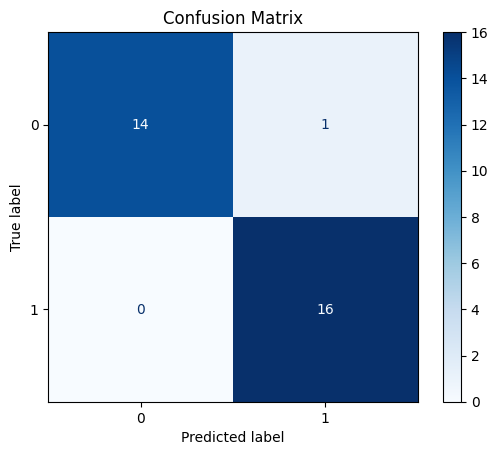

In [800]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

KNN

In [801]:
#When K = 5

#KNN MODEL building


knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier = knn_classifier.fit(x_train_selected,y_train)


#prediction

Y_pred = knn_classifier.predict(x_test_selected)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.8709677419354839
KNN Precision: 0.875
KNN Forest Recall: 0.875
KNN Forest F1 Score: 0.875


In [802]:
#when k = 6

knn_classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.9032258064516129
KNN Precision: 0.9333333333333333
KNN Forest Recall: 0.875
KNN Forest F1 Score: 0.9032258064516129


In [803]:
# When k= 7

knn_classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)
#prediction
Y_pred = knn_classifier.predict(x_test_selected)
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8823529411764706
KNN Forest Recall: 0.9375
KNN Forest F1 Score: 0.9090909090909091


In [804]:
#When k= 8


knn_classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

#check accuracy

print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))


KNN Accuracy: 0.9032258064516129
KNN Precision: 0.9333333333333333
KNN Forest Recall: 0.875
KNN Forest F1 Score: 0.9032258064516129


In [805]:
#When k = 9


knn_classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_selected,y_train)

#prediction
Y_pred = knn_classifier.predict(x_test_selected)

In [806]:
print("KNN Accuracy:",accuracy_score(y_test,Y_pred))
print("KNN Precision:",precision_score(y_test,Y_pred))
print("KNN Forest Recall:",recall_score(y_test,Y_pred))
print("KNN Forest F1 Score:",f1_score(y_test,Y_pred))

KNN Accuracy: 0.9032258064516129
KNN Precision: 0.8823529411764706
KNN Forest Recall: 0.9375
KNN Forest F1 Score: 0.9090909090909091


In [807]:
cm = confusion_matrix(y_test,Y_pred)
cm

array([[13,  2],
       [ 1, 15]])

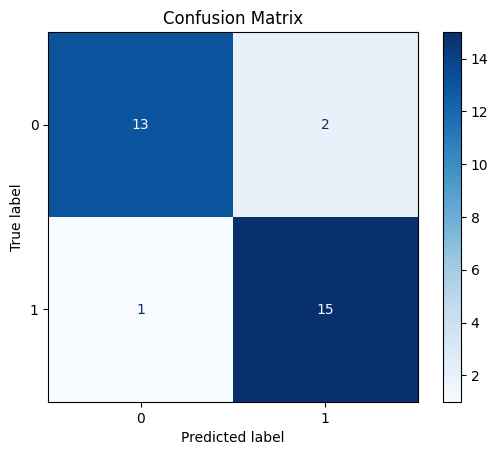

In [808]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# **GB**

In [809]:
# Create the Gradient Boosting classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001],
    'max_depth': [5],
    'min_samples_split': [30],
    'min_samples_leaf': [1],
    'random_state': [0]
}

# Instantiate the GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_classifier = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier on the training data
gb_classifier.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [30],
                         'n_estimators': [50, 100], 'random_state': [0]},
             scoring='accuracy')

In [810]:
# Make predictions on the test data
Y_pred2 = gb_classifier.predict(x_test_selected)

In [811]:
print("GB Accuracy:",accuracy_score(y_test,Y_pred2))
print("GB Precision:",precision_score(y_test,Y_pred2))
print("GB Forest Recall:",recall_score(y_test,Y_pred2))
print("GB Forest F1 Score:",f1_score(y_test,Y_pred2))

GB Accuracy: 0.8064516129032258
GB Precision: 0.7272727272727273
GB Forest Recall: 1.0
GB Forest F1 Score: 0.8421052631578948


In [812]:
#confusion matrix

cm = confusion_matrix(y_test,Y_pred2)
cm

array([[ 9,  6],
       [ 0, 16]])

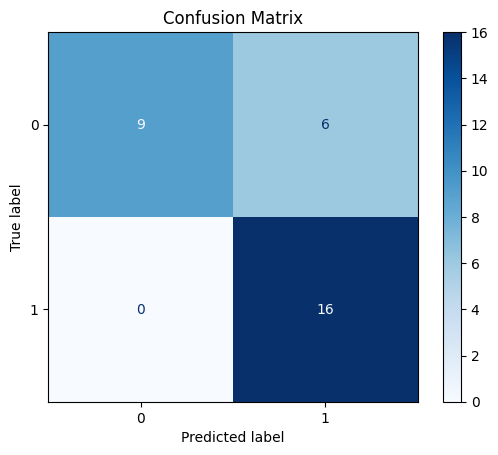

In [813]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [814]:
final_data = pd.DataFrame({'Models':['LR','RF','NB','DT','SVM','KNN','GB','MLP','XGB'],'ACC':[
    accuracy_score(anss,y_test),
    accuracy_score(y_test,rf_pred),
    accuracy_score(y_test,nb_pred),
    accuracy_score(y_test,dc_pred),
   accuracy_score(y_test, Y_predict),
   accuracy_score(y_test, Y_pred),
   accuracy_score(y_test, Y_pred2),
  accuracy_score(y_pred_t,y_test),
  accuracy_score(acc2,y_test)


                                                                                    ]})

In [815]:
final_data

,Models,ACC
0,LR,0.967742
1,RF,0.967742
2,NB,0.903226
3,DT,0.774194
4,SVM,0.967742
5,KNN,0.903226
6,GB,0.806452
7,MLP,0.967742
8,XGB,0.935484


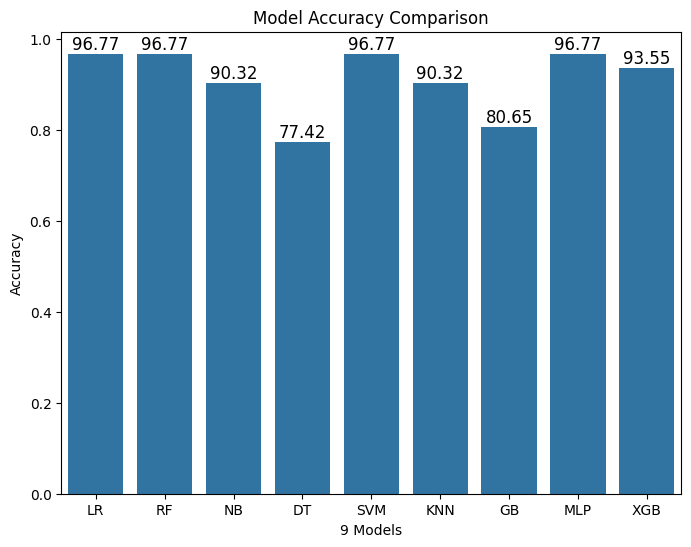

In [816]:
# Plotting the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Model Accuracy Comparison')
plt.xlabel('9 Models')
plt.ylabel('Accuracy')
for index, row in final_data.iterrows():
    plt.text(index, row['ACC'] + 0.01, f'{row["ACC"]*100:.2f}', ha='center', fontsize=12)
plt.show()

# **ROC Curve**

In [817]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

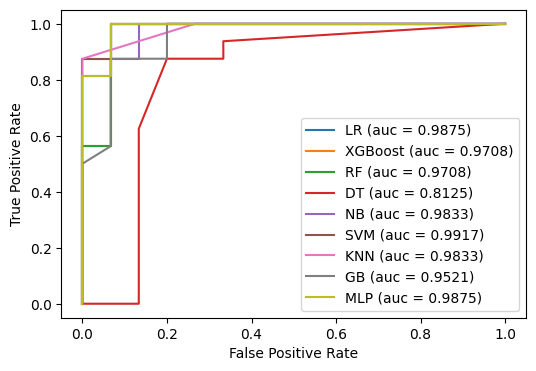

LR AUC: 0.9875
XGB AUC: 0.9708
RF AUC: 0.9708
DT AUC: 0.8125
NB AUC: 0.9833
SVM AUC: 0.9917
KNN AUC: 0.9833
GB AUC: 0.9521
MLP AUC: 0.9875
AUC Score: 0.9708333333333333


In [818]:
#ROC
# LR
y_prob_lr = model.predict_proba(x_test_selected)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
y_prob_xgb = model2.predict_proba(x_test_selected)[:, 1]
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# RF
y_prob_rf = rf_clf.predict_proba(x_test_selected)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(rf_fpr, rf_tpr)

# DT
y_prob_dt = dc_clf.predict_proba(x_test_selected)[:, 1]
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)


# NB
y_prob_nb = nb_clf.predict_proba(x_test_selected)[:, 1]
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(nb_fpr, nb_tpr)

# SVM
y_prob_svm = classifier.predict_proba(x_test_selected)[:, 1]
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(svm_fpr, svm_tpr)

# KNN
y_prob_knn = knn_classifier.predict_proba(x_test_selected)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(knn_fpr, knn_tpr)

# GB
y_prob_gb = gb_classifier.predict_proba(x_test_selected)[:, 1]
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(gb_fpr, gb_tpr)

# MLP
y_prob_mlp = model3.predict_proba(x_test_selected)[:, 1]
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='LR (auc = %0.4f)' % roc_auc_lr)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.4f)' % roc_auc_xgb)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.4f)' % roc_auc_rf)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.4f)' % roc_auc_dt)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='NB (auc = %0.4f)' % roc_auc_nb)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.4f)' % roc_auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.4f)' % roc_auc_knn)
plt.plot(gb_fpr, gb_tpr, linestyle='-', label='GB (auc = %0.4f)' % roc_auc_gb)
plt.plot(mlp_fpr, mlp_tpr, linestyle='-', label='MLP (auc = %0.4f)' % roc_auc_mlp)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('LR AUC: {:.4f}'.format(roc_auc_lr))
print('XGB AUC: {:.4f}'.format(roc_auc_xgb))
print('RF AUC: {:.4f}'.format(roc_auc_rf))
print('DT AUC: {:.4f}'.format(roc_auc_dt))
print('NB AUC: {:.4f}'.format(roc_auc_nb))
print('SVM AUC: {:.4f}'.format(roc_auc_svm))
print('KNN AUC: {:.4f}'.format(roc_auc_knn))
print('GB AUC: {:.4f}'.format(roc_auc_gb))
print('MLP AUC: {:.4f}'.format(roc_auc_mlp))

auc_score = roc_auc_score(y_test, y_prob_xgb)
print("AUC Score:", auc_score)